In [5]:
import sagas.ofbiz.gen_tool as gt

In [6]:
code="""class Schedule extends Equatable {
  DateTime fromDate= DateTime.now();
  TimeOfDay fromTime = const TimeOfDay(hour: 7, minute: 28);
  DateTime toDate = DateTime.now();
  TimeOfDay toTime = const TimeOfDay(hour: 7, minute: 28);
  // final List<String> allActivities = <String>['hiking', 'swimming', 'boating', 'fishing'];
  List<String> allActivities= <String>['hiking', 'swimming'];
  String activity = 'fishing';
"""
meta=gt.analyse(code)
gt.dump(meta)

@class Schedule * Equatable
@prop DateTime * fromDate
@prop TimeOfDay * fromTime
@prop DateTime * toDate
@prop TimeOfDay * toTime
@collection List - String allActivities
@prop String * activity
{
  "class_name": "Schedule",
  "base_name": "Equatable",
  "attributes": [
    {
      "prop_type": "DateTime",
      "prop_name": "fromDate"
    },
    {
      "prop_type": "TimeOfDay",
      "prop_name": "fromTime"
    },
    {
      "prop_type": "DateTime",
      "prop_name": "toDate"
    },
    {
      "prop_type": "TimeOfDay",
      "prop_name": "toTime"
    },
    {
      "prop_name": "allActivities",
      "collection_type": "List",
      "element_type": "String"
    },
    {
      "prop_type": "String",
      "prop_name": "activity"
    }
  ]
}


In [26]:
import re

code="""class LinearSales {
  final int year;
  final int yearLower;
  final int yearUpper;
  final int sales;
  final int salesLower;
  final int salesUpper;
  final double radius;
"""
meta=gt.GenMeta()
prefix="Dss"
for line in code.splitlines():    
    # print(line)
    match_obj=re.match(r'class (.*) {', line, re.M|re.I)
    if match_obj:
        print("@class", match_obj.group(1))
        meta.class_name=prefix+match_obj.group(1)
    else:
        pass
    
    match_obj=re.match(r'\s*(var|final)?\s*([a-zA-Z_][a-zA-Z_0-9]*)\s*([a-zA-Z_][a-zA-Z_0-9]*)\s*(.*);', line, re.M|re.I)
    # match_obj=re.search(r'([a-zA-Z_]+) ([a-zA-Z_]+) = ([a-zA-Z_]+);', line)
    if match_obj:
        print("@prop", match_obj.group(2),'*', match_obj.group(3))
        meta.attributes.append(gt.GenProp(match_obj.group(2), match_obj.group(3)))
    else:
        pass
    
    # process collections
    match_obj=re.match(r'\s*([a-zA-Z_][a-zA-Z_0-9]*)<(.*)>\s*([a-zA-Z_][a-zA-Z_0-9]*)\s*=(.*);', line, re.M|re.I)
    if match_obj:
        print("@collection", match_obj.group(1),"-", match_obj.group(2), match_obj.group(3))
        meta.attributes.append(GenCollection(match_obj.group(1),match_obj.group(2), match_obj.group(3)))
    else:
        pass

gt.dump(meta)

@class LinearSales
@prop int * year
@prop int * yearLower
@prop int * yearUpper
@prop int * sales
@prop int * salesLower
@prop int * salesUpper
@prop double * radius
{
  "class_name": "DssLinearSales",
  "base_name": "",
  "attributes": [
    {
      "prop_type": "int",
      "prop_name": "year"
    },
    {
      "prop_type": "int",
      "prop_name": "yearLower"
    },
    {
      "prop_type": "int",
      "prop_name": "yearUpper"
    },
    {
      "prop_type": "int",
      "prop_name": "sales"
    },
    {
      "prop_type": "int",
      "prop_name": "salesLower"
    },
    {
      "prop_type": "int",
      "prop_name": "salesUpper"
    },
    {
      "prop_type": "double",
      "prop_name": "radius"
    }
  ]
}


In [27]:
type_mappings = {"String": "description",
                 "int":"numeric",
                 "double":"floating-point",
                 "DateTime":"date-time",
                 "Uint8List":"byte-array"}

def get_mapping_type(field_type):    
    if field_type not in type_mappings:
        raise ValueError("Cannot find mapping type for " + field_type)
    return type_mappings[field_type]

print(get_mapping_type('int'))
print(get_mapping_type('DateTime'))

numeric
date-time


In [28]:
from sagas.util.str_converters import to_snake_case, to_words
# print(to_words(to_snake_case('LinearSales'), True))
lines=[]
entity_title=to_words(to_snake_case(meta.class_name), True)
lines.append('    <entity entity-name="{name}" package-name="com.sagas.dss" title="{title}">'.format(
        name=meta.class_name, title=entity_title))
for attr in meta.attributes:
    lines.append('      <field name="%s" type="%s"></field>'%(attr.prop_name, get_mapping_type(attr.prop_type)))
# add the primary key
prim=to_words(meta.class_name)+"Id"
lines.append('      <field name="%s" type="id"></field>'%prim)
lines.append('      <prim-key field="%s"/>'%prim)
lines.append('    </entity>')

print('\n'.join(lines))

    <entity entity-name="DssLinearSales" package-name="com.sagas.dss" title="Dss Linear Sales">
      <field name="year" type="numeric"></field>
      <field name="yearLower" type="numeric"></field>
      <field name="yearUpper" type="numeric"></field>
      <field name="sales" type="numeric"></field>
      <field name="salesLower" type="numeric"></field>
      <field name="salesUpper" type="numeric"></field>
      <field name="radius" type="floating-point"></field>
      <field name="DssLinearSalesId" type="id"></field>
      <prim-key field="DssLinearSalesId"/>
    </entity>


In [30]:
import numpy as np
import pandas as pd
import pyarrow as pa

s = pd.Series(np.random.randint(1, 100, size=10))
s

0    91
1    51
2    94
3    72
4    43
5     1
6    91
7    39
8    10
9    28
dtype: int64

In [39]:
rng = pd.date_range('1/1/2007 00:00', periods=10, freq='Y')
rng

DatetimeIndex(['2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [40]:
ts = pd.Series(np.random.randint(1,100, size=10), rng)
ts

2007-12-31    78
2008-12-31     7
2009-12-31    95
2010-12-31    27
2011-12-31     5
2012-12-31    77
2013-12-31    87
2014-12-31    78
2015-12-31    22
2016-12-31     3
Freq: A-DEC, dtype: int64

In [41]:
# 将时间日期索引转化为时间阶段索引
ps = ts.to_period()
ps

2007    78
2008     7
2009    95
2010    27
2011     5
2012    77
2013    87
2014    78
2015    22
2016     3
Freq: A-DEC, dtype: int64

In [42]:
?ps.to_json

In [43]:
ps.to_json(orient='records')

'[78,7,95,27,5,77,87,78,22,3]'

In [49]:
ps.to_json(orient='table')

'{"schema": {"fields":[{"name":"index","type":"datetime","freq":"A-DEC"},{"name":"values","type":"integer"}],"primaryKey":["index"],"pandas_version":"0.20.0"}, "data": [{"index":"2007-01-01T00:00:00.000Z","values":78},{"index":"2008-01-01T00:00:00.000Z","values":7},{"index":"2009-01-01T00:00:00.000Z","values":95},{"index":"2010-01-01T00:00:00.000Z","values":27},{"index":"2011-01-01T00:00:00.000Z","values":5},{"index":"2012-01-01T00:00:00.000Z","values":77},{"index":"2013-01-01T00:00:00.000Z","values":87},{"index":"2014-01-01T00:00:00.000Z","values":78},{"index":"2015-01-01T00:00:00.000Z","values":22},{"index":"2016-01-01T00:00:00.000Z","values":3}]}'

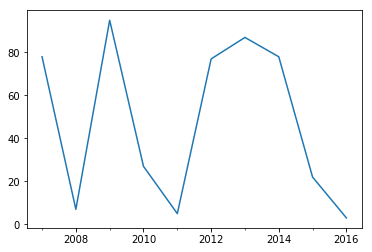

In [59]:
import matplotlib.pyplot as plt
ps.plot()
plt.show()

In [68]:
for it in ps.items():
    period=it[0]
    print(period.start_time	, period.freq)
    print('\t', str(period), it[1])

2007-01-01 00:00:00 <YearEnd: month=12>
	 2007 78
2008-01-01 00:00:00 <YearEnd: month=12>
	 2008 7
2009-01-01 00:00:00 <YearEnd: month=12>
	 2009 95
2010-01-01 00:00:00 <YearEnd: month=12>
	 2010 27
2011-01-01 00:00:00 <YearEnd: month=12>
	 2011 5
2012-01-01 00:00:00 <YearEnd: month=12>
	 2012 77
2013-01-01 00:00:00 <YearEnd: month=12>
	 2013 87
2014-01-01 00:00:00 <YearEnd: month=12>
	 2014 78
2015-01-01 00:00:00 <YearEnd: month=12>
	 2015 22
2016-01-01 00:00:00 <YearEnd: month=12>
	 2016 3


In [66]:
?pd.Period

In [69]:
from sagas.ofbiz.entities import OfEntity as e
e('meta').DssOrdinalSales

,internal,name,primary,type,field type
0,,year,,description,description
1,,sales,,numeric,numeric
2,,DssOrdinalSalesId,*,id,id
3,*,lastUpdatedStamp,,date-time,date-time
4,*,lastUpdatedTxStamp,,date-time,date-time
5,*,createdStamp,,date-time,date-time
6,*,createdTxStamp,,date-time,date-time


In [76]:
entity_name="DssOrdinalSales"
id_col="dssOrdinalSalesId"
index_col='year'
val_col='sales'

lines=[]
data_header='''<?xml version="1.0" encoding="UTF-8"?>
<entity-engine-xml>'''
data_footer='''</entity-engine-xml>'''
data_item='''    <{entity} {id_col}="{id}" {index_col}="{index}" {val_col}="{val}"/>'''
lines.append(data_header)
for it in ps.items():
    period=it[0]
    # print(period.start_time	, period.freq)
    lines.append(data_item.format(entity=entity_name, 
                                 id_col=id_col,
                                 index_col=index_col,
                                 val_col=val_col,
                                 id=str(period.start_time),
                                 index=str(period),
                                 val=it[1]))
lines.append(data_footer)
cnt='\n'.join(lines)
print(cnt)

<?xml version="1.0" encoding="UTF-8"?>
<entity-engine-xml>
    <DssOrdinalSales dssOrdinalSalesId="2007-01-01 00:00:00" year="2007" sales="78"/>
    <DssOrdinalSales dssOrdinalSalesId="2008-01-01 00:00:00" year="2008" sales="7"/>
    <DssOrdinalSales dssOrdinalSalesId="2009-01-01 00:00:00" year="2009" sales="95"/>
    <DssOrdinalSales dssOrdinalSalesId="2010-01-01 00:00:00" year="2010" sales="27"/>
    <DssOrdinalSales dssOrdinalSalesId="2011-01-01 00:00:00" year="2011" sales="5"/>
    <DssOrdinalSales dssOrdinalSalesId="2012-01-01 00:00:00" year="2012" sales="77"/>
    <DssOrdinalSales dssOrdinalSalesId="2013-01-01 00:00:00" year="2013" sales="87"/>
    <DssOrdinalSales dssOrdinalSalesId="2014-01-01 00:00:00" year="2014" sales="78"/>
    <DssOrdinalSales dssOrdinalSalesId="2015-01-01 00:00:00" year="2015" sales="22"/>
    <DssOrdinalSales dssOrdinalSalesId="2016-01-01 00:00:00" year="2016" sales="3"/>
</entity-engine-xml>


In [78]:
import io_utils
io_utils.write_to_file('./data/dss/'+entity_name+"GenData.xml", cnt)

In [73]:
lower_first = lambda s: s[:1].lower() + s[1:] if s else ''
print(lower_first('DssOrdinalSales'))

dssOrdinalSales


In [1]:
from sagas.ofbiz.entities import OfEntity as e, get_package_entities
get_package_entities('com.sagas.dss')

{'DssLinearSales', 'DssOrdinalSales'}